In [1]:
pwd 

'/work/hpc/potato/SinoNom/src/data/components'

In [1]:
import json 
import numpy as np
from analyzer import Analyzer

In [2]:
import matplotlib.pyplot as plt

# Test

In [12]:
dataset = dict()
with open("/data/hpc/potato/sinonom/data/wb_recognition_dataset/manifest.json", "r") as file:
    dataset = json.load(file)

In [30]:
cached_dataset = dict()
with open("/data/hpc/potato/sinonom/data/wb_recognition_dataset/manifest_split.json", "r") as file:
    cached_dataset = json.load(file)

In [15]:
train_dataset = dataset['train']
train_cached_dataset = cached_dataset['train']

In [16]:
keys = list(train_dataset.keys())

In [38]:
count = [len(train_dataset[key]) for key in keys]
cached_count = [len(train_cached_dataset[key]) for key in keys]

In [19]:
x = range(0, len(count))

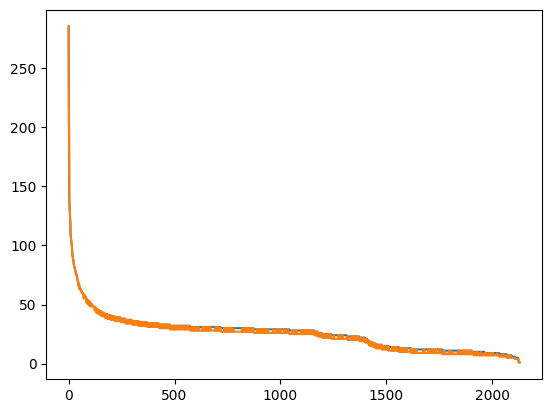

In [20]:
plt.plot(x, count)
plt.plot(x, cached_count)
plt.show()

Seems like it really just mildly downsample, really gud

In [32]:
val_dataset = dataset['val']
cached_dataset['val'].update(cached_dataset['cache'])
val_cached_dataset = cached_dataset['val']


In [33]:
val_cached_dataset?

Type:        dict
String form: {'1677': ['381.jpg', '388.jpg', '373.jpg', '392.jpg', '390.jpg', '387.jpg', '389.jpg', '383.jpg', <...> , '467': ['copy/467_19_467.png'], '647': ['copy/647_26_647.png'], '954': ['copy/954_19_954.png']}
Length:      2130
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

2130 labels shows that it covered the dataset

In [37]:
val_count = [len(val_dataset[key]) if key in val_dataset.keys() else 0 for key in keys]
val_cached_count = [len(val_cached_dataset[key]) for key in keys]

In [39]:
diff = np.sum(cached_count) + np.sum(val_cached_count) - np.sum(val_count) - np.sum(count)
print(diff)

5


Seems like it does it job !!! New manifest approved :D

In [ ]:
count = [len(train_dataset[key]) for key in keys]
cached_count = [len(train_cached_dataset[key]) for key in keys]

In [13]:
values, count = np.unique(hard_sample_count, return_counts=True)

In [ ]:
pri

In [14]:
for vc in zip(values, count):
    print(vc)

(0, 463)
(1, 634)
(2, 247)
(3, 138)
(4, 123)
(5, 71)
(6, 53)
(7, 44)
(8, 39)
(9, 34)
(10, 33)
(11, 24)
(12, 18)
(13, 8)
(14, 22)
(15, 13)
(16, 11)
(17, 12)
(18, 12)
(19, 6)
(20, 9)
(21, 5)
(22, 4)
(23, 7)
(24, 4)
(25, 5)
(26, 4)
(27, 2)
(28, 6)
(29, 6)
(30, 1)
(31, 3)
(32, 4)
(33, 3)
(34, 3)
(35, 2)
(36, 3)
(37, 2)
(38, 2)
(39, 3)
(41, 1)
(42, 3)
(43, 4)
(44, 1)
(46, 1)
(47, 1)
(48, 2)
(49, 2)
(52, 2)
(53, 2)
(54, 1)
(56, 1)
(58, 1)
(60, 1)
(61, 2)
(62, 1)
(64, 1)
(65, 1)
(67, 1)
(68, 1)
(70, 3)
(74, 1)
(75, 2)
(78, 1)
(79, 1)
(90, 1)
(94, 1)
(100, 1)
(101, 1)
(104, 1)
(114, 1)
(172, 1)
(192, 1)
(255, 1)


# Analyzer

Test with different manifest to test features

In [3]:
analyzer = Analyzer("/data/hpc/potato/sinonom/data/wb_recognition_dataset/manifest_split.json", data_dir='/data/hpc/potato/sinonom/data/wb_recognition_dataset', cache_dir='cache')

Total samples: 58210


In [4]:
v_mean, v_std, v_dist, v_upsample, v_missing = analyzer.valid_fill_label(0.9)

Mean: 2.691079812206573
Valid mean samples 2.691079812206573
Valid standard deviation 1.5538428081705213
Missing labels 0


In [5]:
print(v_dist)

[32  4  1 ...  1  1  1]


In [5]:
values = list(v_missing.values())
x = range(0, len(v_missing))

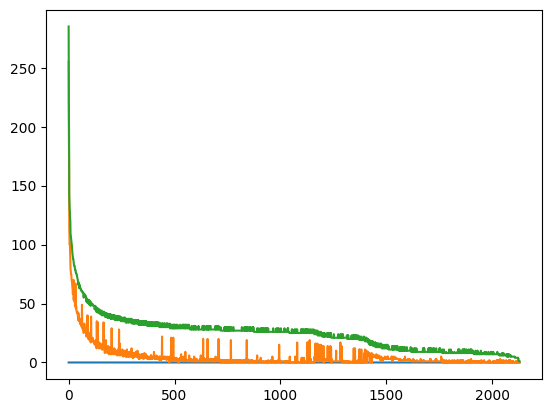

In [6]:
plt.plot(x, values)
plt.plot(x, list(analyzer.train_hard_dist.values()))
plt.plot(x, list(analyzer.train_full_dist.values()))
plt.show()

How the fuck can validation mean can be its own freaking adoijdaiupn standard deviation ????

In [7]:
miss_req, miss_h_req, miss_n_req = analyzer.query_train(v_missing, maximum_exploit=0.3)
up_req, up_h_req, up_n_req = analyzer.query_train(v_upsample, maximum_exploit=0.1)

In [8]:
v_d = np.array(list(analyzer.val_dist.values()))
hr_d = np.array(list(miss_h_req.values()))
nr_d = np.array(list(miss_n_req.values()))
r_d = np.array(list(miss_req.values()))


uhr_d = np.array(list(up_h_req.values()))
unr_d = np.array(list(up_n_req.values()))
ur_d = np.array(list(up_req.values()))

x = range(v_d.shape[0])
sample = v_d + hr_d + nr_d + uhr_d + unr_d 


In [8]:
np.where(sample == 0)

(array([2125, 2126, 2127, 2128, 2129]),)

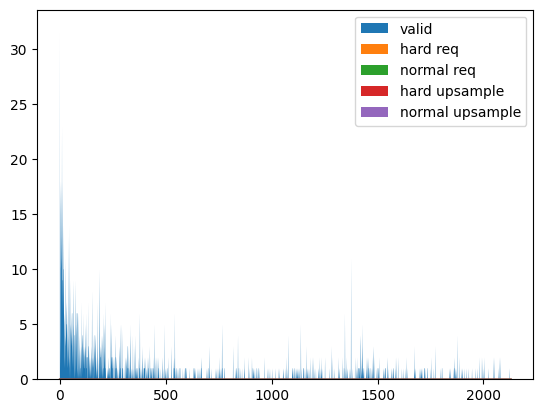

In [10]:

plt.stackplot(x, v_d, hr_d, nr_d, uhr_d, unr_d,
                labels=['valid', 'hard req', 'normal req', 'hard upsample', 'normal upsample'])
plt.legend()
plt.plot(x, unr_d)

plt.show()

Solved :D Now to caching validation data to folder

In [11]:
analyzer.extract(req, h_req, n_req, maximum_exploit=0.4, export="/data/hpc/potato/sinonom/data/wb_recognition_dataset/manifest_split.json", refresh=True)

Deleted all contents of the folder: /data/hpc/potato/sinonom/data/wb_recognition_dataset/cache


In [11]:
w = analyzer.train_loss_weight()

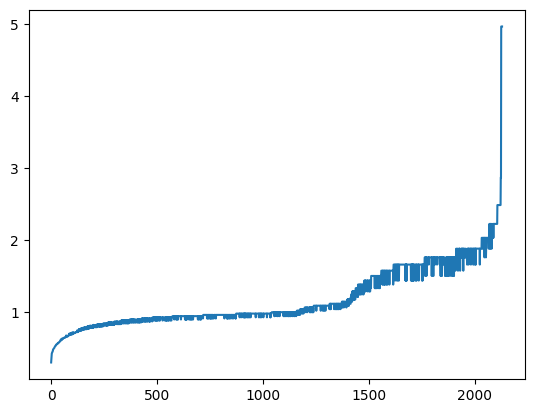

In [12]:
plt.plot(x, w)
plt.show()

In [13]:
w[0]

0.2940196835841068